In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split, learning_curve, validation_curve, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from xgboost import XGBClassifier

In [3]:
def get_accuracy(model):

    print('-' * 80)
    print(f'\nMODEL: {model}\n')

    # Get sklearn accuracy score for given model; e.g., https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.score
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print(f'[*] Train Score: {str(train_score)}')
    print(f'[*] Test Score: {str(test_score)}')

    y_pred = model.predict(X_test)
    print('\n[*] Test Classification Report: \n', metrics.classification_report(y_test, y_pred))

    print('[*] Confusion Matrix on Test data')
    '''
    metrics.ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        display_labels=list(range(2)), # length of unique values for label
    )
    '''
    cm = metrics.confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()

    print(f'[*] Test Accuracy: {str(round(test_score, 5) * 100)}%')
    print('-' * 80 + '\n')

def select_optimal_model_parameters(default_model, gridsearch_model):
    """ Calculates accuracy for the default and Gridsearch nominated parameters and appends the model with the highest accuracy to the model evaluation list """
    # save for selection comparison against GridSearch nomination
    y_pred = default_model.predict(X_test)
    default_model_acc = metrics.accuracy_score(y_test, y_pred) *100

    y_pred = gridsearch_model.predict(X_test)
    gridsearch_model_acc = metrics.accuracy_score(y_test, y_pred) *100

    # Compare the default and GridSearch paramaters for highest accuracy model to append to evaluation list
    if default_model_acc >= gridsearch_model_acc:
        print('Default parameter model selected')
        models.append(default_model)
    else:
        print('Gridsearch parameter model selected')
        models.append(gridsearch_model)

In [4]:
def plot_learning_curve(estimator, X, y, train_sizes, cv):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes, cv=cv, scoring='accuracy', n_jobs=-1
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Score')
    plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score')
    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy Score')
    plt.legend()
    plt.show()

def plot_validation_curve(clf, X_train, y_train, param_name, cv):
    # Define the hyperparameter range
    param_range = np.arange(1, 21)

    # Calculate training and validation scores over the specified hyperparameter range
    train_scores, test_scores = validation_curve(
        clf, X_train, y_train, param_name=param_name, param_range=param_range,
        cv=cv, scoring="accuracy", n_jobs=-1
    )

    # Plot the validation curve
    plt.figure(figsize=(10, 6))
    plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Score')
    plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Score')
    plt.title('Model Complexity Graph')
    plt.xlabel(f'{param_name}')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [5]:
models = []
file_path = "Obfuscated-MalMem2022.csv"
data = pd.read_csv(file_path)
# data.head()
# data.describe().T
# data.info()
data.drop(['handles.nport', 'pslist.nprocs64bit', 'svcscan.interactive_process_services'], axis=1, inplace=True)
data = data.sample(n=40000, random_state=42)


data['Class'].replace({'Benign':0, 'Malware':1}, inplace=True)
data[['Cat1', 'Cat2']] = data['Category'].str.extract('(\w+)-(\w+)-.*', expand=True).fillna('Benign')
label_encoder = LabelEncoder()
data['Cat1'] = label_encoder.fit_transform(data['Cat1'])
data['Cat2'] = label_encoder.fit_transform(data['Cat2'])

# correlation_matrix = data.corr()
# plt.figure(figsize=(40,40))
# sns.heatmap(correlation_matrix, annot=True, center=0)

data.drop(['Category'], axis=1, inplace=True)

# correlations = []
# for feature in data.columns:
#     corr = data['Class'].corr(data[feature]) * 100
#     abs_corr = abs(corr)
#     correlations.append(abs_corr)
# y = sorted(correlations)
# X = [x for x in range(len(y))]
# mean = np.mean(correlations)
# fourth_quant = np.quantile(correlations, 0.75)
# high_correlation_threshold = fourth_quant # equals 74

# hc_features = []
# for feature in data.columns:
#     corr = data['Class'].corr(data[feature]) * 100
#     abs_corr = abs(corr)
#     if abs_corr > high_correlation_threshold:
#         hc_features.append(feature)
# hc_data = pd.DataFrame(data[hc_features])
# # hc_data.info()
# features=hc_data.columns
# scaled_ds=pd.DataFrame(hc_data, columns=hc_data.columns)
# for feature in features:
#     Q1 = scaled_ds[feature].quantile(0.25)
#     Q3 = scaled_ds[feature].quantile(0.75)
#     IQR = Q3 - Q1

#     scaled_ds = scaled_ds[~((scaled_ds[feature] < (Q1 - 1.5 * IQR)) | (scaled_ds[feature] > (Q3 + 1.5 * IQR)))]

# X = scaled_ds[features]
# y = scaled_ds['Class']

X=pd.DataFrame(data)
X.drop(['Class','Cat1','Cat2'],axis=1,inplace=True)
y=pd.DataFrame(data['Class'])

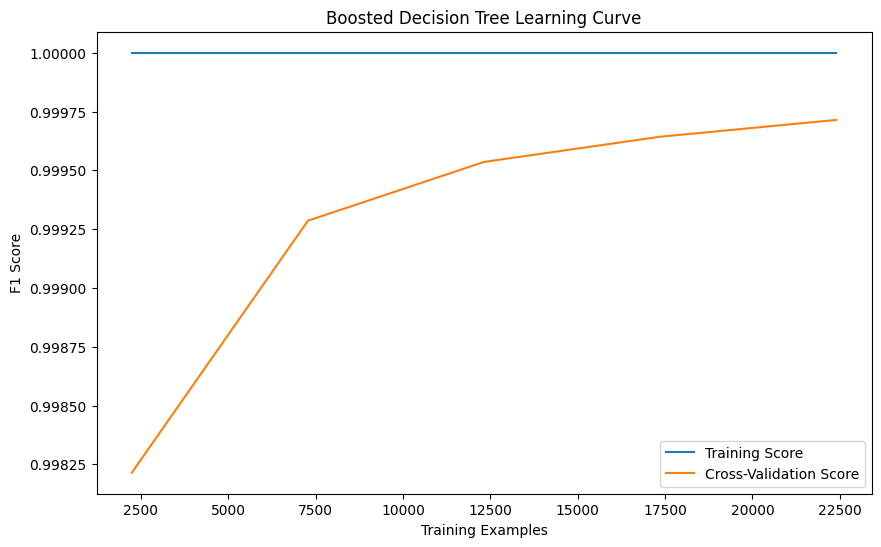

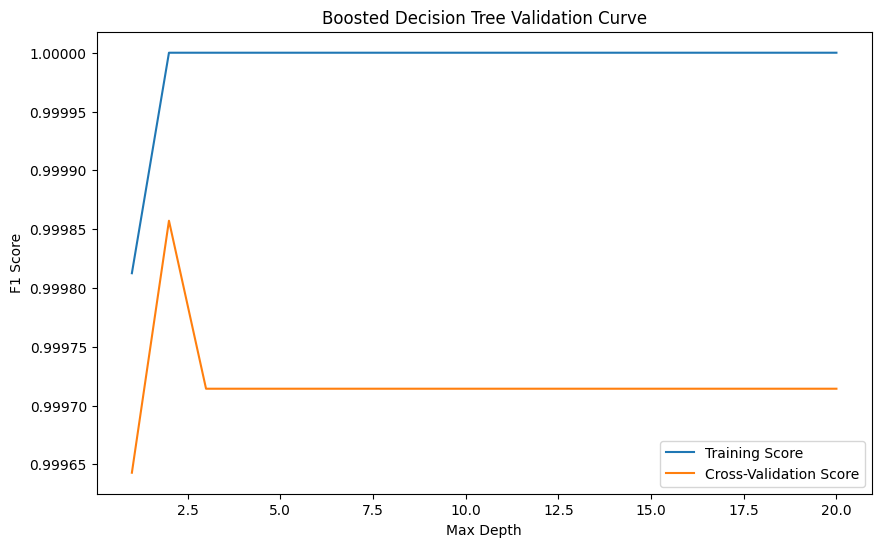

Accuracy on Test Set: 0.9999
F1 Score on Test Set: 0.9999
--------------------------------------------------------------------------------

MODEL: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

[*] Train Score: 1.0
[*] Test Score: 0.9999166666666667

[*] Test Classification Report: 
    

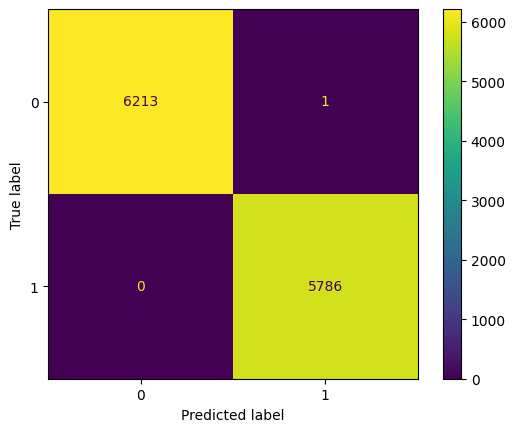

[*] Test Accuracy: 99.992%
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------

MODEL: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

[*] Train Score: 0.9999642857142857
[*] Test Score: 0.

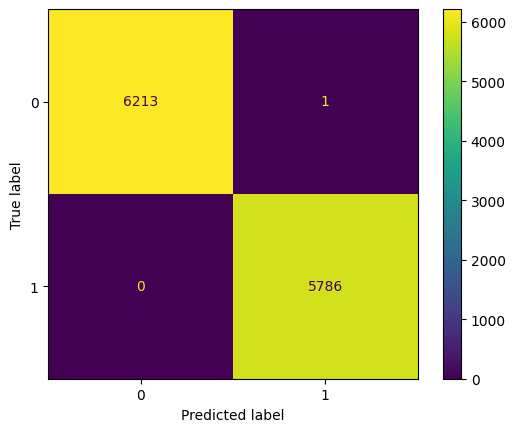

[*] Test Accuracy: 99.992%
--------------------------------------------------------------------------------

Default parameter model selected
Total time taken : 0.76 seconds


In [6]:
import time
start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import MinMaxScaler

# Instantiate the scaler
scaler = MinMaxScaler()
scaler.fit(X_train)

# T
X_train[X_train.columns] = scaler.transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

# Impacted accuracy when changed, implies model were sensitive to less distance (-1 to 1 vs. 0 to 1)
# Using manual replacement instead
y_train.replace(-1.0, 0, inplace=True)
y_test.replace(-1.0, 0, inplace=True)

# # Initialize XGBoost classifier
clf = XGBClassifier(objective='binary:logistic')
clf.fit(X_train, y_train)

# Predictions
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

end_time = time.time()

# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.title('Boosted Decision Tree Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

# Plot validation curve for max_depth
param_range = np.arange(1, 21)
train_scores, test_scores = validation_curve(clf, X_train, y_train, param_name="max_depth", param_range=param_range, cv=5, scoring="accuracy", n_jobs=-1)

plt.figure(figsize=(10, 6))
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.title('Boosted Decision Tree Validation Curve')
plt.xlabel('Max Depth')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

# Fit the final model with the optimal max_depth
optimal_max_depth = param_range[np.argmax(np.mean(test_scores, axis=1))]
final_clf = XGBClassifier(objective='binary:logistic',eval_metric='logloss',max_depth=3,min_child_weight=1,subsample=0.8,colsample_bytree=0.8)
final_clf.fit(X_train, y_train)

# Evaluate on the test set
y_pred = final_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy on Test Set: {accuracy:.4f}")
print(f"F1 Score on Test Set: {f1:.4f}")

get_accuracy(clf)

param_grid = {
    'max_depth': [3, 5],
    'min_child_weight': [1, 3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1],
    'learning_rate': [0.01, 0.1]
}


# Instantiate and fit the GridSearch run
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1).fit(X_train, y_train)
grid_search.fit(X_train, y_train)
clf_gs = grid_search.best_estimator_

# Review the GridSearch nominated optimal model parameters
grid_search.best_estimator_.get_params()

get_accuracy(clf_gs)

select_optimal_model_parameters(clf, clf_gs)

total_time = end_time-start_time
print(f"Total time taken : {total_time:.2f} seconds")

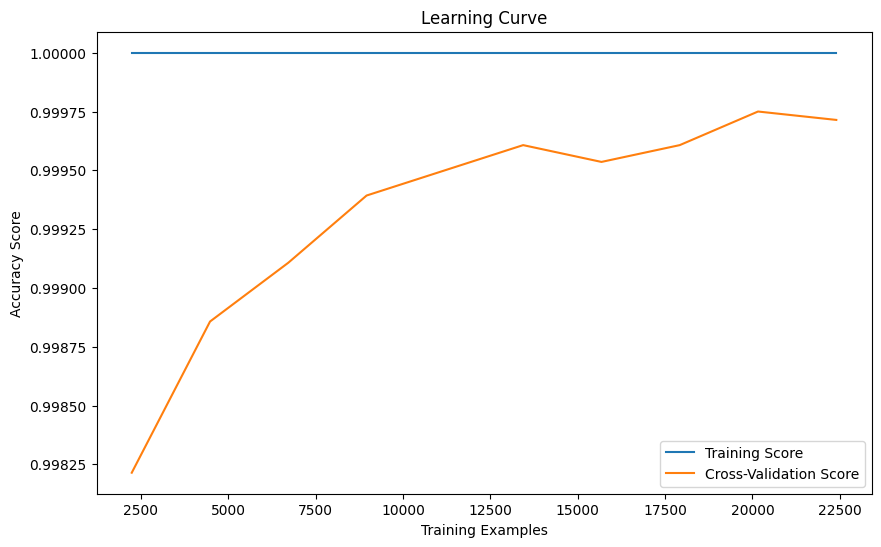

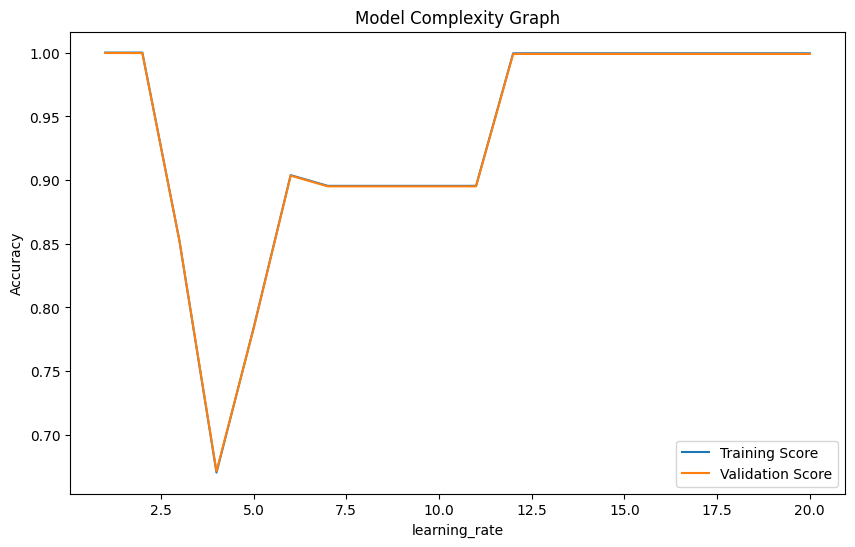

In [7]:
train_sizes = np.linspace(0.1, 1.0, 10)

# Plot the learning curve
plot_learning_curve(clf, X_train, y_train, train_sizes, cv=5)
# Plot the Validation curve
plot_validation_curve(clf,X_train, y_train,'learning_rate', cv=5)

--------------------------------------------------------------------------------

MODEL: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

[*] Train Score: 1.0
[*] Test Score: 1.0

[*] Test Classification Report: 
               precision    recall  f1-score   support

           0       1.

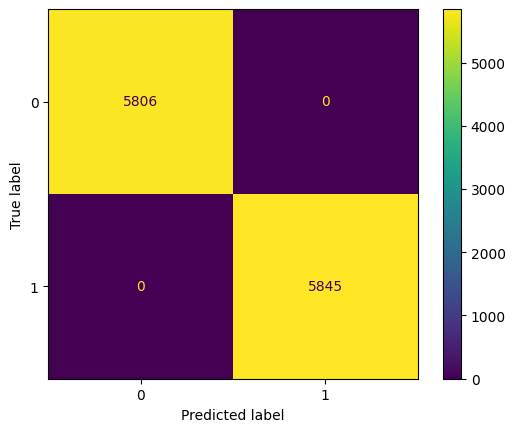

[*] Test Accuracy: 100.0%
--------------------------------------------------------------------------------

CPU times: total: 2.41 s
Wall time: 491 ms


In [7]:
%%time

from xgboost import XGBClassifier

clf = XGBClassifier(objective='binary:logistic')
clf.fit(X_train, y_train)

# Display performance metrics
get_accuracy(clf)

--------------------------------------------------------------------------------

MODEL: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

[*] Train Score: 1.0
[*] Test Score: 1.0

[*] Test Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.

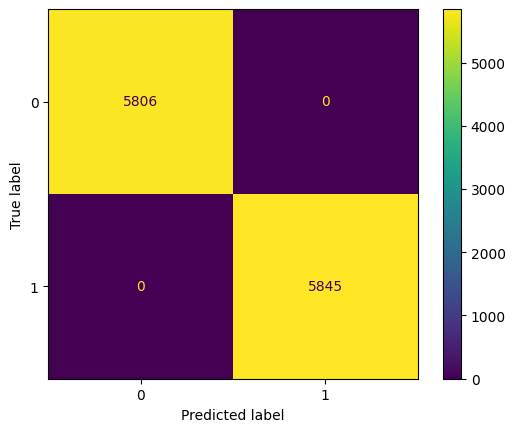

[*] Test Accuracy: 100.0%
--------------------------------------------------------------------------------

GridSearchCV Best Parameters:
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.8}
CPU times: total: 16.7 s
Wall time: 25.3 s


In [9]:
%%time

param_grid = {
    'max_depth': [3, 5],
    'min_child_weight': [1, 3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1],
    'learning_rate': [0.01, 0.1]
}


# Instantiate and fit the GridSearch run
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1).fit(X_train, y_train)
grid_search.fit(X_train, y_train)
clf_gs = grid_search.best_estimator_

# Review the GridSearch nominated optimal model parameters
grid_search.best_estimator_.get_params()

get_accuracy(clf_gs)
# Additional details from GridSearchCV
print("GridSearchCV Best Parameters:")
print(grid_search.best_params_)

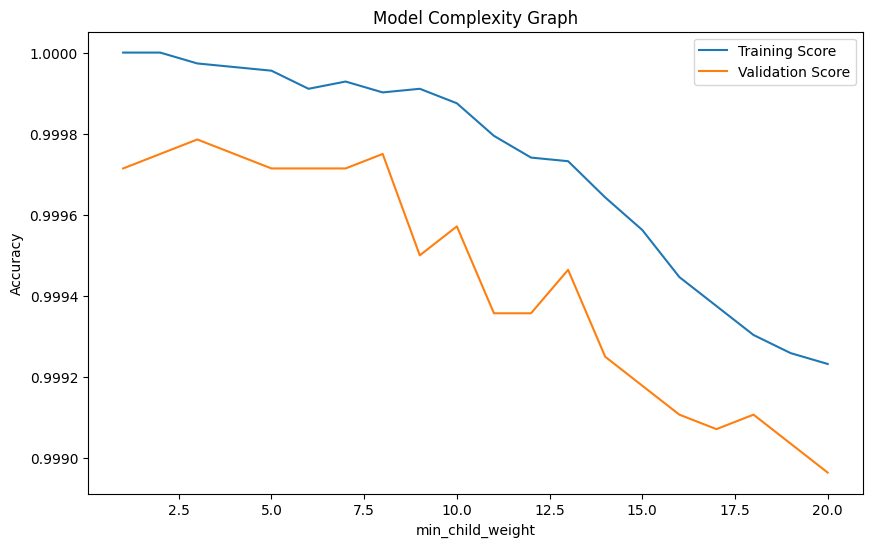

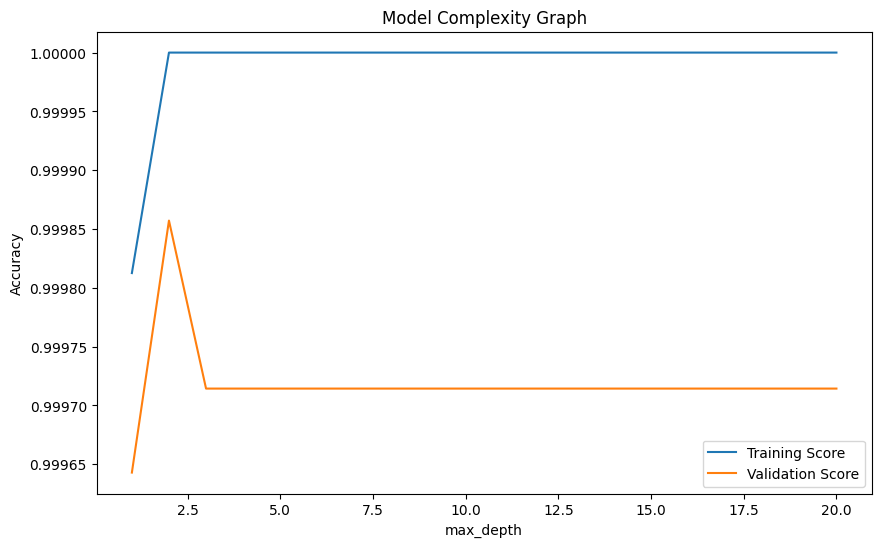

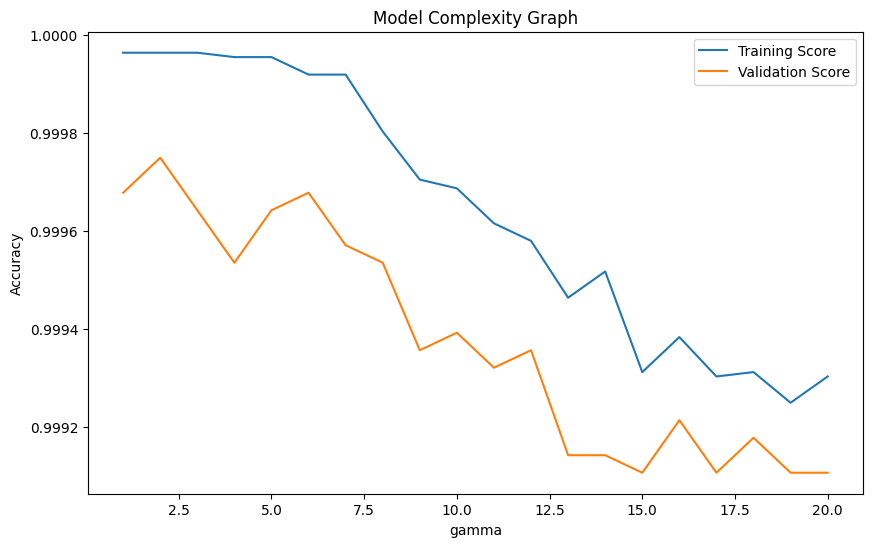

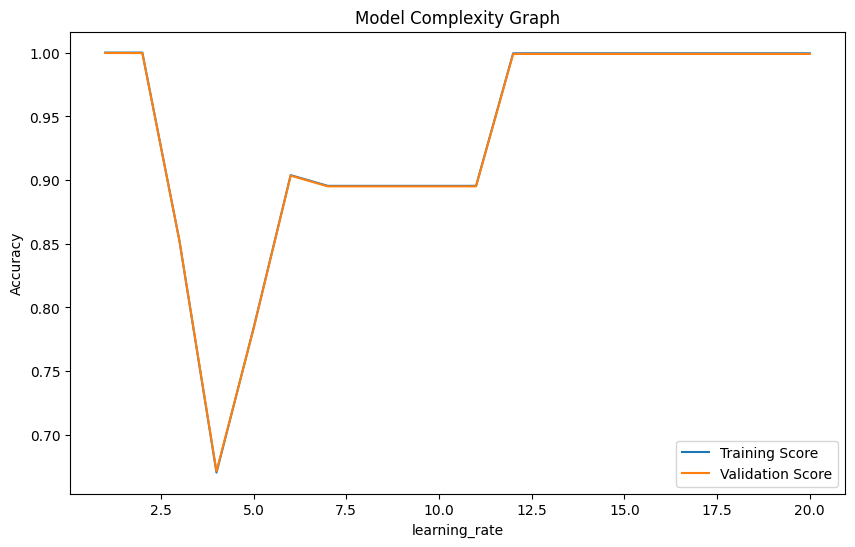

In [8]:
plot_validation_curve(clf,X_train, y_train,'min_child_weight', cv=5)
plot_validation_curve(clf,X_train, y_train,'max_depth', cv=5)
plot_validation_curve(clf,X_train, y_train,'gamma', cv=5)
plot_validation_curve(clf,X_train, y_train,'learning_rate', cv=5)